In [2]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
from tensorflow import keras
import segmentation_models as sm
from sklearn.model_selection import train_test_split
import tensorflow as tf

from utils.general_utils import *
from utils.data_utils import *
from utils.data_wrappers import *
from utils.submission_utils import *
from utils.run_utils import *

Segmentation Models: using `tf.keras` framework.


In [3]:
# Not recommended to run without GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


Data paths

In [4]:
DATA_DIR = "data"

im_dir = os.path.join(DATA_DIR, 'training/images')
gt_dir = os.path.join(DATA_DIR, 'training/groundtruth')

test_dir = os.path.join(DATA_DIR, 'test')

Load images and plot example image

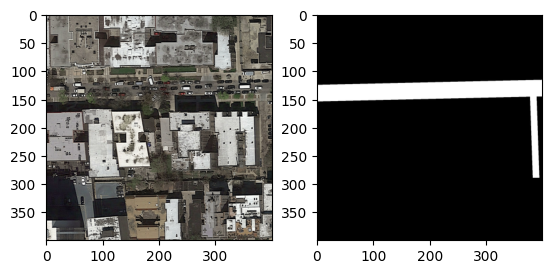

In [5]:
images = imagepath_to_list(im_dir, gt_dir, resize=None)
plot_random(images)

Augment images and show example

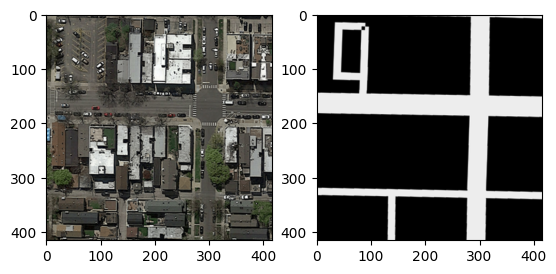

In [6]:
images, augmented= augmentat_images(images, 1)
plot_random(augmented)

Define network parameters

In [7]:
BACKBONE = 'efficientnetb0'
BATCH_SIZE = 32
CLASSES = ['road']
LR = 0.001
EPOCHS = 2

preprocess_input = sm.get_preprocessing(BACKBONE)

n_classes = 1
activation = 'sigmoid'

#create model
model = sm.Unet(BACKBONE, classes=n_classes, activation=activation)
model.compile()

In [ ]:
#Either load saved model weights or run train.ipynb first
model.load_weights('best_model.weights.h5')

Predict on test and visualize

In [9]:
test_dataset = TestDataset(
    test_dir,
    augmentation=get_augmentation(),
    preprocessing=get_preprocessing(preprocess_input),
)

create_predictions(model, test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


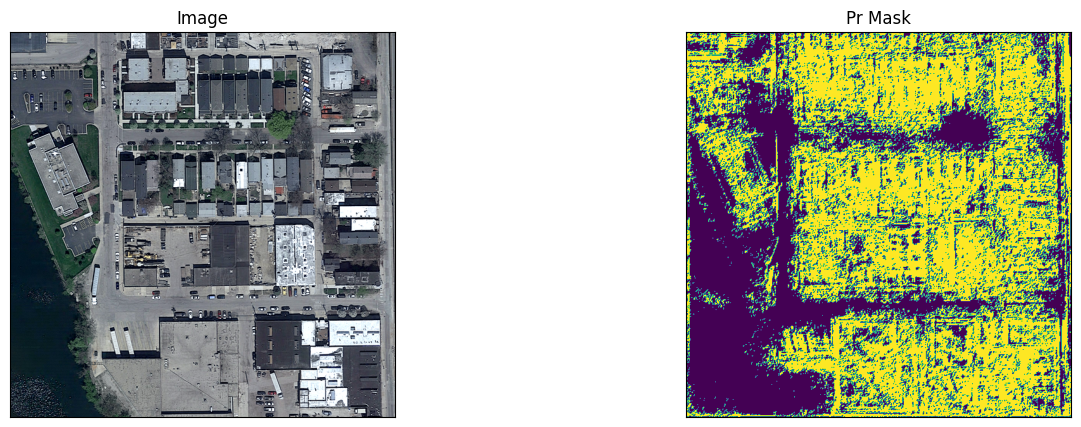

In [10]:
visualize_predict(model, test_dataset)

Create submission

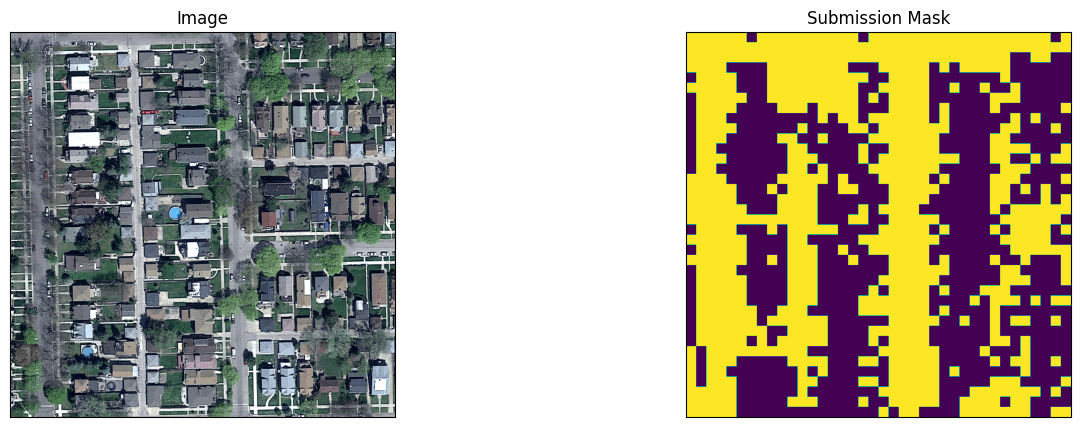

In [13]:
create_submission()
visualize_submission(test_dataset)